In [25]:
import numpy as np
import pandas as pd
import datetime as dt

In [26]:
df =pd.read_excel("/content/OnlineRetail.xlsx" )
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
df.shape

(541909, 8)

In [29]:
df = df.dropna()

In [30]:
df.shape

(406829, 8)

In [31]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
df.duplicated().sum()
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
df['revenue']= df['Quantity'] * df['UnitPrice']
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [35]:
revenue = df.groupby('CustomerID')['revenue'].sum()
revenue = revenue.reset_index()
print(revenue)

      CustomerID  revenue
0        12346.0     0.00
1        12347.0  4310.00
2        12348.0  1797.24
3        12349.0  1757.55
4        12350.0   334.40
...          ...      ...
4367     18280.0   180.60
4368     18281.0    80.82
4369     18282.0   176.60
4370     18283.0  2094.88
4371     18287.0  1837.28

[4372 rows x 2 columns]


In [36]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
print(frequency)
type(frequency)

      CustomerID  InvoiceNo
0        12346.0          2
1        12347.0        182
2        12348.0         31
3        12349.0         73
4        12350.0         17
...          ...        ...
4367     18280.0         10
4368     18281.0          7
4369     18282.0         13
4370     18283.0        756
4371     18287.0         70

[4372 rows x 2 columns]


pandas.core.frame.DataFrame

In [37]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
from datetime import date , time
df['recency']= df['InvoiceDate'].max()- df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [40]:
recency = df.groupby('CustomerID')['recency'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [41]:
rfm = revenue
rfm.head()

,CustomerID,revenue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [42]:
rfm['frequency']=frequency['InvoiceNo']
rfm.head()

,CustomerID,revenue,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [43]:
rfm['recency']=recency['recency'].dt.days
rfm.head()

,CustomerID,revenue,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [44]:
rfm.describe()

,CustomerID,revenue,frequency,recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,91.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,17.000000,16.000000
50%,15300.500000,648.075000,42.000000,49.000000
75%,16778.250000,1611.725000,102.000000,142.000000
max,18287.000000,279489.020000,7983.000000,373.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


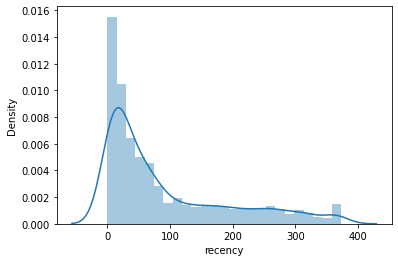

In [45]:
# plot graphs
#Recency distribution plot
import seaborn as sns
x = rfm['recency']

ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


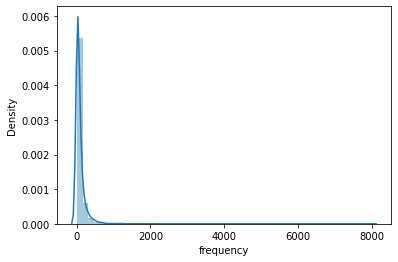

In [46]:

x = rfm['frequency']

ax = sns.distplot(x)

In [47]:
quantiles = rfm.quantile([0.25,0.50,0.75])
quantiles

,CustomerID,revenue,frequency,recency
0.25,13812.75,293.3625,17.0,16.0
0.50,15300.50,648.0750,42.0,49.0
0.75,16778.25,1611.7250,102.0,142.0


In [48]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [49]:
rfm['R']=rfm['recency'].apply(RScoring,args=('recency',quantiles,))
rfm['F']=rfm['frequency'].apply(FnMScoring,args=('frequency',quantiles,))
rfm['M']=rfm['revenue'].apply(FnMScoring,args=('revenue',quantiles,))

rfm.head()


,CustomerID,revenue,frequency,recency,R,F,M
0,12346.0,0.00,2,325,4,4,4
1,12347.0,4310.00,182,1,1,1,1
2,12348.0,1797.24,31,74,3,3,1
3,12349.0,1757.55,73,18,2,2,1
4,12350.0,334.40,17,309,4,4,3


In [50]:
rfm['groups']= rfm['R']*100 + rfm['F']*10 + rfm['M']
rfm.head()

,CustomerID,revenue,frequency,recency,R,F,M,groups
0,12346.0,0.00,2,325,4,4,4,444
1,12347.0,4310.00,182,1,1,1,1,111
2,12348.0,1797.24,31,74,3,3,1,331
3,12349.0,1757.55,73,18,2,2,1,221
4,12350.0,334.40,17,309,4,4,3,443


In [51]:
rfm['RFMScore'] = rfm['R']+rfm['F']+rfm['M']
rfm.head()

,CustomerID,revenue,frequency,recency,R,F,M,groups,RFMScore
0,12346.0,0.00,2,325,4,4,4,444,12
1,12347.0,4310.00,182,1,1,1,1,111,3
2,12348.0,1797.24,31,74,3,3,1,331,7
3,12349.0,1757.55,73,18,2,2,1,221,5
4,12350.0,334.40,17,309,4,4,3,443,11


In [52]:
customer_classification=['CLASS A','CLASS B','CLASS C','CLASS D']
final_score = pd.qcut(rfm.RFMScore , q=4 ,labels =customer_classification)
rfm['LOYALTY']= final_score.values
rfm.reset_index().head()


,index,CustomerID,revenue,frequency,recency,R,F,M,groups,RFMScore,LOYALTY
0,0,12346.0,0.00,2,325,4,4,4,444,12,CLASS D
1,1,12347.0,4310.00,182,1,1,1,1,111,3,CLASS A
2,2,12348.0,1797.24,31,74,3,3,1,331,7,CLASS B
3,3,12349.0,1757.55,73,18,2,2,1,221,5,CLASS A
4,4,12350.0,334.40,17,309,4,4,3,443,11,CLASS D
